# Covid-19 European Data Analysis

In [1]:
from datetime import date, timedelta
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Reading Data

In [2]:
url = "https://raw.githubusercontent.com/ec-jrc/COVID-19/master/data-by-region/jrc-covid-19-all-days-by-regions.csv"

In [3]:
df = pd.read_csv(url)
df.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID


In [4]:
df.shape

(330751, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330751 entries, 0 to 330750
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 330751 non-null  object 
 1   iso3                 330751 non-null  object 
 2   CountryName          330751 non-null  object 
 3   Region               232294 non-null  object 
 4   lat                  309277 non-null  float64
 5   lon                  309277 non-null  float64
 6   CumulativePositive   326149 non-null  float64
 7   CumulativeDeceased   267623 non-null  float64
 8   CumulativeRecovered  143236 non-null  float64
 9   CurrentlyPositive    330751 non-null  int64  
 10  Hospitalized         83702 non-null   float64
 11  IntensiveCare        76795 non-null   float64
 12  EUcountry            330751 non-null  bool   
 13  EUCPMcountry         330751 non-null  bool   
 14  NUTS                 315539 non-null  object 
dtypes: bool(2), float

In [6]:
print("Data from {} to {}".format(df.Date.min(), df.Date.max()))

Data from 2020-01-03 to 2021-11-24


## Data cleaning

In [7]:
df.dropna(axis=0, subset=["lat", "lon"], inplace=True)

In [8]:
df.shape

(309277, 15)

## Geodataframe

Important to select the Coordinate Reference System (CRS), used to project data to a flatten earth

In [9]:
crs = "EPSG:4326"

In [10]:
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI,POINT (-63.07213 18.22512)
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM,POINT (-61.36413 15.41675)
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO,POINT (-70.16174 18.73651)
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK,POINT (-59.52884 -51.80058)
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID,POINT (118.01557 -2.51872)


## Maps

In [11]:
map_source = ctx.providers.Stamen.TonerLite  # map provider and type
EPSG = 3857                                  # EPSG used with Stamen

yesterday = date.today() - timedelta(days=1)

#Select your prefered date
#date = "2021-11-23"
date = yesterday.strftime("%Y-%m-%d")

### Plotting Map

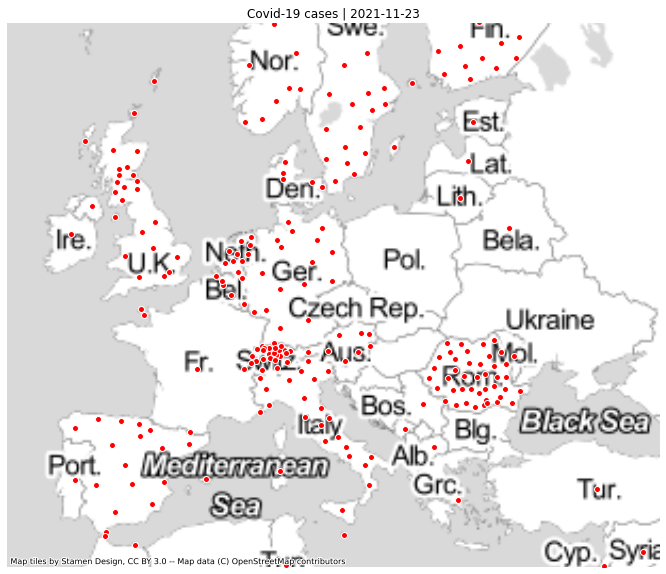

In [12]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == date].to_crs(epsg=3857).plot(ax=ax, color="red", edgecolor="white")
ctx.add_basemap(ax, source=map_source)
plt.title("Covid-19 cases | {}".format(date))
plt.axis("off")
ax.set_xlim(-1.5e6, 4.5e6)
ax.set_ylim(4e6, 9e6)

plt.show()

### Bubble Maps

In [13]:
# necessary to apply a normalization before (multiplied to highligth the values)
increase=500
gdf["normalized_deceased"] = ((gdf["CumulativeDeceased"] - gdf["CumulativeDeceased"].min())/(gdf["CumulativeDeceased"].max() - gdf["CumulativeDeceased"].min()))*100*increase
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry,normalized_deceased
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI,POINT (-63.07213 18.22512),0.0
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM,POINT (-61.36413 15.41675),0.0
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO,POINT (-70.16174 18.73651),0.0
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK,POINT (-59.52884 -51.80058),0.0
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID,POINT (118.01557 -2.51872),0.0


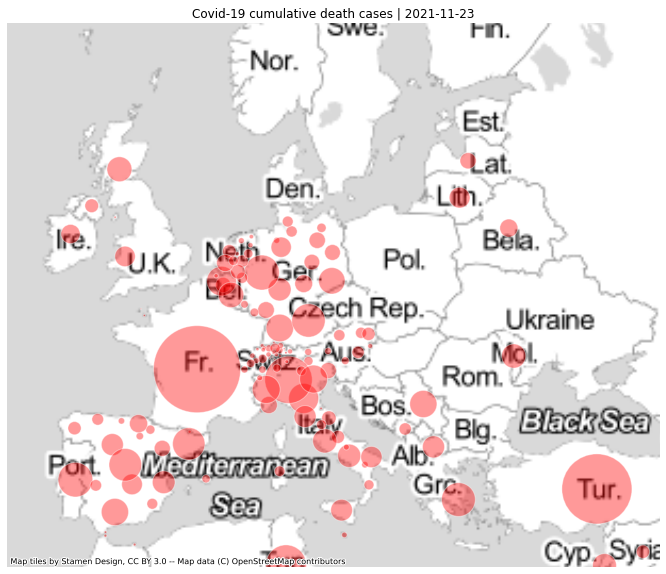

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == date].to_crs(epsg=3857).plot(markersize="normalized_deceased", alpha=0.4, ax=ax, color="red", edgecolor="white")
ctx.add_basemap(ax, source=map_source)
plt.title("Covid-19 cumulative death cases | {}".format(date))
plt.axis("off")
ax.set_xlim(-1.5e6, 4.5e6)
ax.set_ylim(4e6, 9e6)
plt.show()

### Choropleth Map

In [15]:
path = "data/NUTS_RG_01M_2021_4326_LEVL_0.geojson"
eu_lv0 = gpd.read_file(path)
eu_lv0.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ,CZ,0,CZ,Česko,Česko,0,None,0,CZ,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
1,DE,DE,0,DE,Deutschland,Deutschland,0,None,0,DE,"MULTIPOLYGON (((10.45444 47.55580, 10.43954 47..."
2,DK,DK,0,DK,Danmark,Danmark,0,None,0,DK,"MULTIPOLYGON (((15.19308 55.32014, 15.19056 55..."
3,AL,AL,0,AL,Shqipëria,Shqipëria,0,None,0,AL,"MULTIPOLYGON (((19.83100 42.46645, 19.83568 42..."
4,CY,CY,0,CY,Kýpros,Κύπρος,0,None,0,CY,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35..."


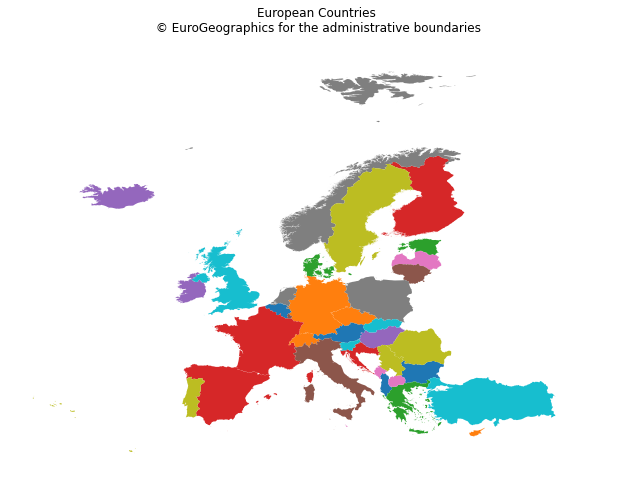

In [16]:
eu_lv0.plot("CNTR_CODE", figsize=(12,8));
plt.title("European Countries\n © EuroGeographics for the administrative boundaries")
plt.axis("off")
plt.xlim(-35,55);
plt.ylim(30,85);

It's possible to merge JRC Covid data with country Boundaries. The use of a left join instead of an inner join permits to show all the countries, even without covid data.

In [17]:
sjoined = gpd.sjoin(gdf, eu_lv0, predicate="within")
sjoined_to_merge = sjoined[["Date", "CumulativePositive", "CumulativeDeceased", "CumulativeRecovered", "NUTS_ID", "CountryName"]].fillna(0).groupby(["Date", "NUTS_ID", "CountryName"]).sum().reset_index()
merged_gdf = pd.merge(eu_lv0, sjoined_to_merge[sjoined_to_merge["Date"] == date], on="NUTS_ID", how="left")
merged_gdf[["CumulativePositive", "CumulativeDeceased", "CumulativeRecovered"]] = merged_gdf[["CumulativePositive", "CumulativeDeceased", "CumulativeRecovered"]].fillna(0)
merged_gdf.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Date,CountryName,CumulativePositive,CumulativeDeceased,CumulativeRecovered
0,CZ,CZ,0,CZ,Česko,Česko,0,None,0,CZ,"POLYGON ((14.49122 51.04353, 14.49945 51.04610...",NaN,NaN,0.0,0.0,0.0
1,DE,DE,0,DE,Deutschland,Deutschland,0,None,0,DE,"MULTIPOLYGON (((10.45444 47.55580, 10.43954 47...",2021-11-23,Germany,5430911.0,99433.0,0.0
2,DK,DK,0,DK,Danmark,Danmark,0,None,0,DK,"MULTIPOLYGON (((15.19308 55.32014, 15.19056 55...",2021-11-23,Denmark,0.0,0.0,0.0
3,AL,AL,0,AL,Shqipëria,Shqipëria,0,None,0,AL,"MULTIPOLYGON (((19.83100 42.46645, 19.83568 42...",NaN,NaN,0.0,0.0,0.0
4,CY,CY,0,CY,Kýpros,Κύπρος,0,None,0,CY,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35...",NaN,NaN,0.0,0.0,0.0


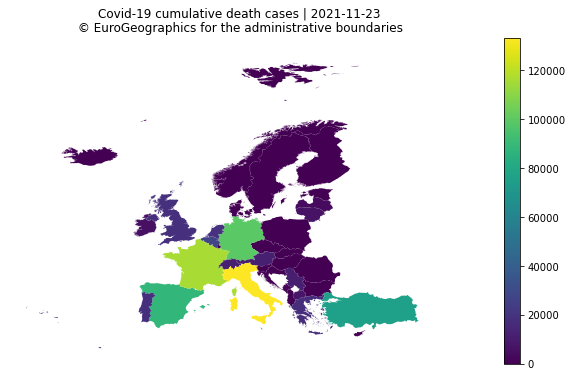

In [18]:
merged_gdf.plot("CumulativeDeceased", legend=True, figsize=(12,6));
plt.title("Covid-19 cumulative death cases | {}\n © EuroGeographics for the administrative boundaries".format(date))
plt.axis("off")
plt.xlim(-35,55);
plt.ylim(30,85);

In [19]:
population = pd.read_csv("data/WPP2019_TotalPopulationBySex.csv")
population2019 = population[population["Time"]==2019]
population2019.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
69,4,Afghanistan,2,Medium,2019,2019.5,19529.727,18512.030,38041.757,58.269
953,903,Africa,2,Medium,2019,2019.5,653513.680,654550.496,1308064.176,44.119
1837,1823,African Group,2,Medium,2019,2019.5,652644.714,653675.858,1306320.572,44.464
1988,1560,African Union,2,Medium,2019,2019.5,652949.469,653953.561,1306903.030,44.085
2139,2080,African Union: Central Africa,2,Medium,2019,2019.5,76945.498,77068.207,154013.705,29.192


In [20]:
merged_population = merged_gdf.merge(population2019, left_on="CountryName", right_on="Location", how="left")
merged_population["normalized_deceased"] = (merged_population["CumulativeDeceased"] / (merged_population["PopTotal"].astype("float")*1000))*100
merged_population["normalized_deceased"] = merged_population["normalized_deceased"].fillna(0)

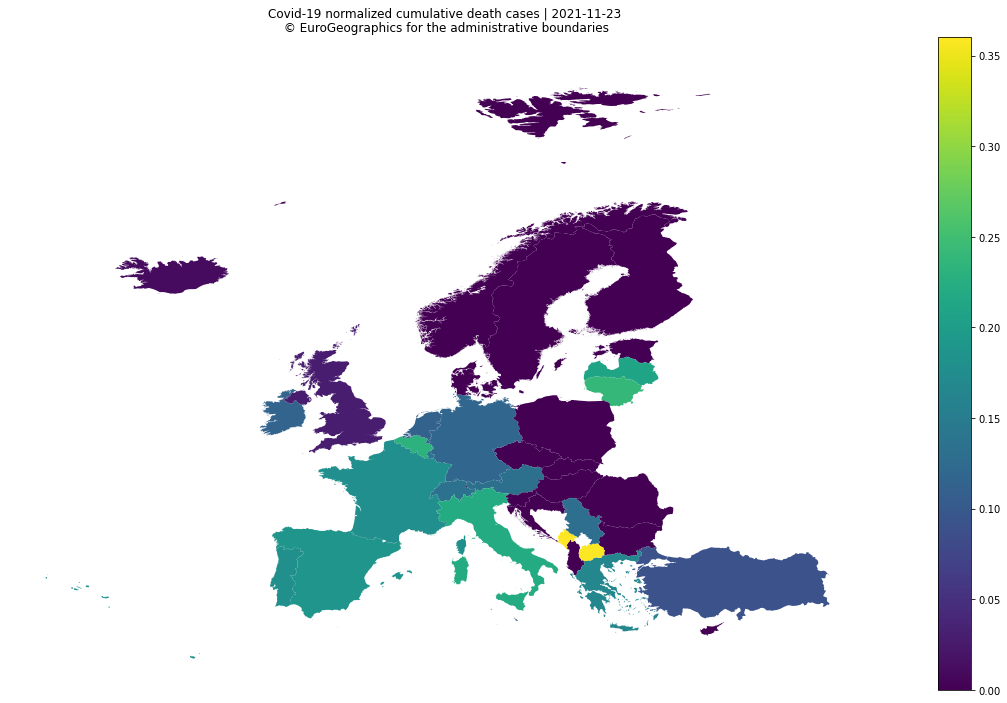

In [21]:
merged_population.plot("normalized_deceased", legend=True, figsize=(20,12));
plt.title("Covid-19 normalized cumulative death cases | {}\n © EuroGeographics for the administrative boundaries".format(date))
plt.axis("off")
plt.xlim(-35,50);
plt.ylim(30,85);